# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [174]:
print(da.DMDMARTL.value_counts())
print(da.DMDMARTL.value_counts().sum())
print(da.shape)
print(pd.isnull(da.DMDMARTL).sum())
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 6:"Living with partner", 77: "Refused", 99: "Don't know"})
print(da.DMDMARTLx.value_counts())
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
print(da.RIAGENDRx.value_counts())

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64
5474
(5735, 31)
261
Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64
Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [175]:
print(da.DMDMARTLx.dropna().describe())
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
x = da.DMDMARTLx.value_counts()
print(x / x.sum())
dx= da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()
print(dx)
dx=dx.unstack()
dx= dx.apply(lambda x: x/x.sum(),axis=1)
print(dx.to_string(float_format="%.3f"))

count        5474
unique          7
top       Married
freq         2780
Name: DMDMARTLx, dtype: object
Married                0.484743
Never Married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Separated              0.032432
Refused                0.000349
Name: DMDMARTLx, dtype: float64
RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never Married           520
           Divorced                350
           Widowed                 296
           Living with partner     262
           Missing                 126
           Separated               118
           Refused                   1
Male       Married                1477
           Never Married           484
           Living with partner     265
           Divorced                229
           Missing                 135
           Widowed                 100
           Separated            

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [176]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
dx= da.groupby(["agegrp","RIAGENDRx"])["DMDMARTLx"].value_counts()
dx= dx.unstack()
dx= dx.apply(lambda x: x/x.sum())
print(dx.to_string(float_format="%.2f"))

DMDMARTLx           Divorced  Living with partner  Married  Missing  Never Married  Refused  Separated  Widowed
agegrp   RIAGENDRx                                                                                             
(18, 30] Female         0.02                 0.22     0.06     0.44           0.26      NaN       0.06      NaN
         Male           0.00                 0.18     0.04     0.56           0.26      NaN       0.04     0.01
(30, 40] Female         0.07                 0.11     0.09      NaN           0.10      NaN       0.09     0.01
         Male           0.04                 0.14     0.09      NaN           0.09     0.50       0.06     0.01
(40, 50] Female         0.12                 0.07     0.10      NaN           0.06      NaN       0.18     0.03
         Male           0.06                 0.06     0.10      NaN           0.04      NaN       0.06     0.01
(50, 60] Female         0.14                 0.06     0.09      NaN           0.04     0.50       0.15  

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [178]:
da_female= da[da.RIAGENDRx == "Female"]
da_female.head()
da_female["agegrp2"] = pd.cut(da.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])
da_female= da_female.groupby(["agegrp2"])["DMDMARTLx"].value_counts().unstack()
print(da_female)
da_female_prop= da_female.apply(lambda y: y/y.sum(), axis=1)
print(da_female_prop.to_string(float_format="%.2f"))

DMDMARTLx  Divorced  Living with partner  Married  Missing  Never Married  \
agegrp2                                                                     
(10, 20]        NaN                  8.0      1.0    126.0           30.0   
(20, 30]       11.0                106.0    157.0      NaN          229.0   
(30, 40]       43.0                 57.0    258.0      NaN           97.0   
(40, 50]       69.0                 37.0    288.0      NaN           63.0   
(50, 60]       83.0                 32.0    257.0      NaN           42.0   
(60, 70]       85.0                 19.0    212.0      NaN           38.0   
(70, 80]       59.0                  3.0    130.0      NaN           21.0   

DMDMARTLx  Refused  Separated  Widowed  
agegrp2                                 
(10, 20]       NaN        NaN      NaN  
(20, 30]       NaN       11.0      NaN  
(30, 40]       NaN       17.0      2.0  
(40, 50]       NaN       33.0     12.0  
(50, 60]       1.0       27.0     28.0  
(60, 70]       NaN 

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [179]:
da_male= da[da.RIAGENDRx == "Male"]
da_male["agegrp2"] = pd.cut(da.RIDAGEYR, [10,20, 30, 40, 50, 60, 70, 80])
da_male= da_male.groupby(["agegrp2"])["DMDMARTLx"].value_counts().unstack()
print(da_male)
da_male_prop= da_male.apply(lambda y: y/y.sum(), axis=1)
print(da_male_prop.to_string(float_format="%.2f"))

DMDMARTLx  Divorced  Living with partner  Married  Missing  Never Married  \
agegrp2                                                                     
(10, 20]        NaN                  3.0      1.0    135.0           36.0   
(20, 30]        2.0                 92.0    103.0      NaN          226.0   
(30, 40]       24.0                 72.0    258.0      NaN           89.0   
(40, 50]       34.0                 33.0    282.0      NaN           39.0   
(50, 60]       57.0                 34.0    296.0      NaN           47.0   
(60, 70]       55.0                 22.0    291.0      NaN           38.0   
(70, 80]       57.0                  9.0    246.0      NaN            9.0   

DMDMARTLx  Refused  Separated  Widowed  
agegrp2                                 
(10, 20]       NaN        NaN      NaN  
(20, 30]       NaN        7.0      2.0  
(30, 40]       1.0       12.0      2.0  
(40, 50]       NaN       11.0      2.0  
(50, 60]       NaN       10.0     10.0  
(60, 70]       NaN 

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

163.4    30
169.6    29
168.4    29
167.9    29
161.0    28
Name: BMXHT, dtype: int64


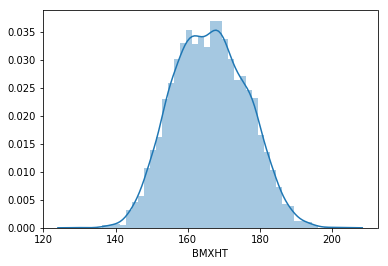

In [180]:
print(da.BMXHT.value_counts().head())
sns.distplot(da.BMXHT.dropna())

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

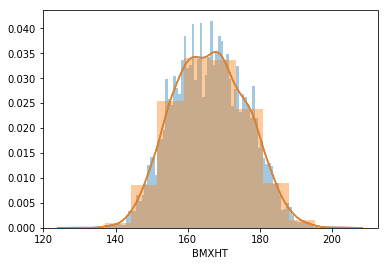

In [181]:
sns.distplot(da.BMXHT.dropna(), bins = 100)
sns.distplot(da.BMXHT.dropna(), bins = 10)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

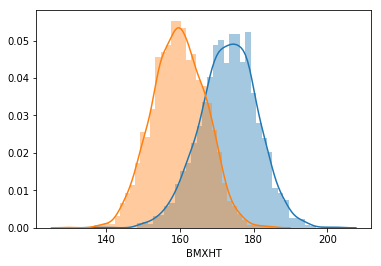

In [182]:
sns.distplot(da[da.RIAGENDRx == "Male"].BMXHT.dropna())
sns.distplot(da[da.RIAGENDRx == "Female"].BMXHT.dropna())
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

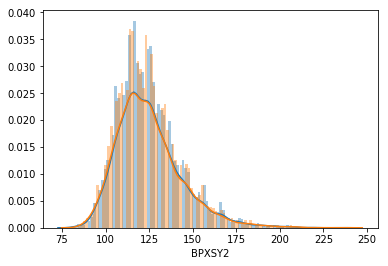

In [183]:
sns.distplot(da.BPXSY1.dropna(),bins= 100)
sns.distplot(da.BPXSY2.dropna(),bins= 100)
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [184]:
da1= da[["BPXSY1","BPXSY2"]]
da1["diff"]= da1["BPXSY2"]- da1["BPXSY1"]
da1["Lower"] = 'No'
da1.loc[da1["diff"]<0, 'Lower'] = 'Yes'
print(da1.head())

   BPXSY1  BPXSY2  diff Lower
0   128.0   124.0  -4.0   Yes
1   146.0   140.0  -6.0   Yes
2   138.0   132.0  -6.0   Yes
3   132.0   134.0   2.0    No
4   100.0   114.0  14.0    No


In [185]:
da1.Lower.value_counts("Yes")

No     0.570532
Yes    0.429468
Name: Lower, dtype: float64

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

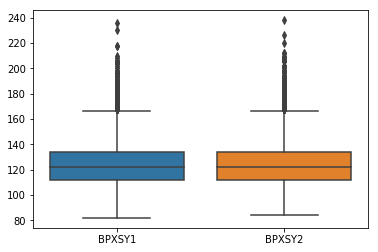

In [186]:
bp = sns.boxplot(data=da.loc[:,["BPXSY1","BPXSY2"]])
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

In [187]:
da1.head()
da1.describe()

,BPXSY1,BPXSY2,diff
count,5401.000000,5535.000000,5369.000000
mean,125.084614,124.783017,-0.674986
std,18.480873,18.527012,5.046465
min,82.000000,84.000000,-32.000000
25%,112.000000,112.000000,-4.000000
50%,122.000000,122.000000,0.000000
75%,134.000000,134.000000,2.000000
max,236.000000,238.000000,26.000000


## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [188]:
da.head()
da2 = da[["DMDHHSIZ","DMDEDUC2"]]
da2["DMDEDUC2x"] = da2.DMDEDUC2.fillna("Missing")
da2["DMDEDUC2x"] = da2.DMDEDUC2.replace({1: "Less than 9th grade", 2:"9-11th grade", 3:"High School graduate",
                                         4:"Some college or AA degree", 5:"College graduate or above", 
                                         7:"Refused", 9: "Dont know"})
da2.head()
da2 = da2.groupby(["DMDEDUC2x"])["DMDHHSIZ"].value_counts().unstack()
print(da2)
da2_prop = da2.apply(lambda z:z/z.sum(), axis=1)
da2_prop.to_string(float_format= "%.2f")
da2_prop

DMDHHSIZ                       1      2      3      4      5     6     7
DMDEDUC2x                                                               
9-11th grade                75.0  143.0  105.0   98.0   94.0  73.0  55.0
College graduate or above  195.0  475.0  265.0  226.0  130.0  40.0  35.0
Dont know                    NaN    2.0    NaN    NaN    1.0   NaN   NaN
High School graduate       181.0  321.0  203.0  192.0  130.0  78.0  81.0
Less than 9th grade         72.0  147.0   96.0   87.0   97.0  71.0  85.0
Some college or AA degree  245.0  436.0  313.0  274.0  198.0  82.0  73.0


DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11th grade,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
College graduate or above,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
Dont know,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN
High School graduate,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
Less than 9th grade,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
Some college or AA degree,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [189]:
da.head()
da3 = da[["DMDHHSIZ","DMDEDUC2","DMDMARTLx","RIAGENDRx","RIDAGEYR"]]
da3["DMDEDUC2x"] = da3.DMDEDUC2.fillna("Missing")
da3["DMDEDUC2x"] = da3.DMDEDUC2.replace({1: "Less than 9th grade", 2:"9-11th grade", 3:"High School graduate",
                                         4:"Some college or AA degree", 5:"College graduate or above", 
                                         7:"Refused", 9: "Dont know"})
print(da3.head())
years = list(range(30,41))
da3_age3040 = da3[da3.RIDAGEYR.isin(years)]
print(da3_age3040.head())
da3_female = da3_age3040[da3_age3040.RIAGENDRx == "Female"].groupby(["DMDEDUC2x"])["DMDHHSIZ"].median()
print(da3_female)
da3_male = da3_age3040[da3_age3040.RIAGENDRx == "Male"].groupby(["DMDEDUC2x"])["DMDHHSIZ"].median()
print(da3_male)

   DMDHHSIZ  DMDEDUC2            DMDMARTLx RIAGENDRx  RIDAGEYR  \
0         2       5.0              Married      Male        62   
1         1       3.0             Divorced      Male        53   
2         2       3.0              Married      Male        78   
3         1       5.0  Living with partner    Female        56   
4         5       4.0             Divorced    Female        42   

                   DMDEDUC2x  
0  College graduate or above  
1       High School graduate  
2       High School graduate  
3  College graduate or above  
4  Some college or AA degree  
    DMDHHSIZ  DMDEDUC2            DMDMARTLx RIAGENDRx  RIDAGEYR  \
7          4       4.0              Married    Female        32   
12         2       4.0  Living with partner    Female        30   
34         3       4.0              Married    Female        37   
50         7       3.0              Married    Female        39   
61         4       3.0              Married    Female        37   

              

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [219]:
da4 = da[["SDMVSTRA","SDMVPSU","RIDAGEYR","BMXHT","BMXBMI","RIAGENDRx"]]
da4["MVU"] = da4.SDMVSTRA.astype(str) + "-" + da4.SDMVPSU.astype(str)
da4_analysis = da4.groupby(["MVU","RIAGENDRx"])["RIDAGEYR","BMXHT","BMXBMI"].mean().unstack()
print(da4_analysis.head())
da4_height = da4.groupby(["MVU","RIAGENDRx"])["BMXHT"].mean().unstack()
da4_height["diff"] = da4_height.Female - da4_height.Male
da4_height.head()

            RIDAGEYR                  BMXHT                 BMXBMI           
RIAGENDRx     Female       Male      Female        Male     Female       Male
MVU                                                                          
119-1      47.663265  47.861111  159.570408  172.741667  30.052041  26.958333
119-2      52.987952  54.363636  159.244578  172.906818  27.849398  27.160465
120-1      43.636364  43.130000  155.402041  169.537755  32.419388  30.939175
120-2      43.736111  45.219178  159.218056  173.075342  27.400000  27.727397
121-1      44.397959  46.750000  158.871579  172.177885  30.856842  29.416505


RIAGENDRx,Female,Male,diff
MVU,,,
119-1,159.570408,172.741667,-13.171259
119-2,159.244578,172.906818,-13.662240
120-1,155.402041,169.537755,-14.135714
120-2,159.218056,173.075342,-13.857287
121-1,158.871579,172.177885,-13.306306


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [222]:
da4_analysis_iqr = da4.groupby(["MVU","RIAGENDRx"])["RIDAGEYR","BMXHT","BMXBMI"].quantile().unstack()
da4_analysis_iqr

0.5       RIDAGEYR         BMXHT         BMXBMI       
RIAGENDRx   Female  Male  Female    Male Female   Male
MVU                                                   
119-1         48.0  51.5  160.80  173.05  29.30  25.60
119-2         59.0  60.0  159.10  172.85  27.50  26.30
120-1         40.0  38.0  155.25  169.50  30.85  29.30
120-2         43.5  45.0  159.20  171.90  26.40  26.90
121-1         41.5  48.5  157.30  172.10  29.10  29.20
121-2         41.0  41.0  159.10  175.70  24.50  26.10
122-1         41.0  43.0  160.95  174.60  27.75  28.00
122-2         47.5  44.0  156.95  170.60  25.35  25.20
123-1         45.0  49.5  161.95  174.30  29.50  28.40
123-2         45.5  53.0  160.80  174.20  29.05  28.20
124-1         54.0  56.0  158.55  172.20  28.60  27.90
124-2         40.0  45.0  163.30  174.40  25.50  26.60
125-1         54.0  60.0  161.40  174.20  29.50  29.20
125-2         54.0  51.0  159.75  174.10  27.00  27.70
126-1         42.5  49.5  160.95  175.60  29.85  28.20
126-2         46.0  47.0  160.45  175.50  28.80  27.90
127-1         50.0  54.0  157.80  171.55  31.90  30.00
127-2         54.0  57.0  158.90  172.95  29.90  29.50
128-1         60.0  59.0  155.75  169.25  31.15  30.55
128-2         46.0  46.0  159.50  172.90  25.85  26.70
129-1         44.0  43.0  156.60  170.65  27.90  26.80
129-2         41.0  43.5  161.00  173.45  29.10  27.85
130-1         45.0  50.0  161.80  177.20  28.60  29.10
130-2         51.5  53.0  159.85  175.70  30.20  27.45
131-1         55.0  54.0  162.35  175.60  28.80  26.95
131-2         45.0  45.5  161.55  174.90  31.50  28.15
132-1         38.0  40.0  162.50  172.80  28.90  27.40
132-2         51.5  48.0  158.95  172.65  28.90  27.90
133-1         45.0  43.0  158.20  171.75  27.60  26.40
133-2         46.0  49.5  157.90  170.65  27.50  26.65

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.